In [1]:
"""
Developed by Shayan Sepahvand, December 2023, Toronto Met. Univ.
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL.Image

2024-01-20 11:11:20.443108: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-20 11:11:20.469038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


Load the images

In [3]:
def load_images_from_folder(directory):
    images = []
    fileslist = os.listdir(directory)
    fileslist = sorted(fileslist , key = lambda fileslist: int(fileslist.split('.')[0]))
    for filename in fileslist:
        #img = cv.imread(os.path.join(directory,filename))
        loc = os.path.join(directory,filename)
        img = tf.keras.preprocessing.image.load_img(loc, target_size=(300, 300))
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        if img is not None:
            images.append(img)
    return np.asarray(images)

Load the angles (labels)

In [4]:
def load_angles_from_folder(directory):
    with open(directory,'r')  as ff:
        content = ff.readline()
        angles = content.split(sep='\t') #lines are separated by tabs
        angles = np.asarray(angles, dtype = np.float32) * (np.pi/180)
        return angles

Load the images and angles

In [5]:
directory_imgs = './Dataset/imgs/'
directory_angles = './Dataset/Labels.txt'
imgs = load_images_from_folder(directory_imgs)
angles = load_angles_from_folder(directory_angles)

Define the Testing Datasets

In [6]:
testing_imgs = np.delete(imgs, np.arange(900 , 999), axis = 0)
testing_angles = np.delete(angles, np.arange(900 , 999), axis = 0)

Load the trained CNN

In [7]:
model = tf.keras.models.load_model('./TrainedCNNs/c910_new')
#model.summary() 
#model.get_config()

2024-01-20 11:11:23.601963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-20 11:11:23.604834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-20 11:11:23.604922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Evaluate the model for test dataset

In [8]:
loss = model.evaluate(testing_imgs, testing_angles, batch_size = 16)

2024-01-20 11:11:24.695152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8906


57/57 [==============================] - 7s 88ms/step - loss: 0.0023 - mean_absolute_error: 0.0377


Tries to load several image from the test dataset and determine the estimated angle versus the real angle

In [9]:
def return_estimated_angles():
    predicted_angles_list = []
    for testimage in testing_imgs:
        test_img = np.expand_dims(testimage , axis = 0)
        predicted_angles = model.predict(test_img , verbose = 0)
        predicted_angles_list.append(predicted_angles)


    return np.array(predicted_angles_list)

Let's plot the estimated angles vs real angles

In [10]:
predicted_angles = return_estimated_angles()
predicted_angles = np.ndarray.flatten(predicted_angles)
predition_error = (predicted_angles - testing_angles)
predition_error_abs = abs(predicted_angles - testing_angles)


In [11]:
np.save('./Results_Paper/group910_new', predition_error_abs)

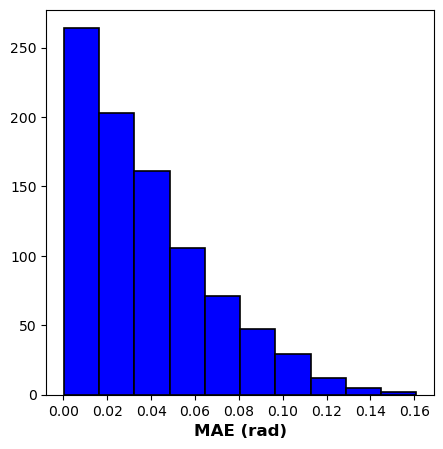

In [12]:
from matplotlib.ticker import PercentFormatter
figure1 = plt.figure(figsize=(5,5))
n_bins = 10;
n, bins, patches = plt.hist(predition_error_abs , bins = n_bins, density = False , color = 'b' , edgecolor='black', linewidth=1.2 , facecolor="blue")
plt.xlabel("MAE (rad)" , fontsize = 12 , weight='bold')
#plt.ylabel("Count",fontsize = 12 , weight='bold')
plt.grid(visible = False, which = 'both')


#----------------------------------------------------------------------



#plt.savefig('./Results_Paper/error_distribution_finetuned.eps', format='eps')